In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/kaggle/input/predicting-hiring-decisions-in-recruitment-data/recruitment_data.csv')
df.shape

(1500, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [6]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [7]:
df['DistanceFromCompany'] = df['DistanceFromCompany'].round().astype(int)

In [8]:
df.head(10)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,27,48,78,91,1,1
1,39,1,4,12,3,26,35,68,80,2,1
2,48,0,2,3,2,10,20,67,13,2,0
3,34,1,2,5,2,6,36,27,70,3,0
4,30,0,1,6,1,43,23,52,85,2,0
5,27,0,3,14,4,32,54,50,50,1,1
6,48,0,2,6,1,17,24,52,64,3,0
7,40,0,4,13,3,11,6,3,92,3,0
8,26,1,3,6,5,29,80,78,51,1,1
9,45,1,2,2,5,30,92,16,94,3,0


In [9]:
df.tail(10)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
1490,32,0,3,10,4,50,20,51,51,2,0
1491,43,1,2,15,3,7,51,79,23,2,0
1492,39,0,2,11,3,14,81,5,52,2,0
1493,43,1,2,14,4,26,42,36,55,1,0
1494,34,1,1,6,2,43,51,84,62,1,0
1495,48,0,2,3,4,9,66,3,80,3,1
1496,27,1,2,10,3,15,43,97,7,2,0
1497,24,1,1,1,2,4,31,91,58,1,1
1498,48,0,2,4,4,36,9,37,44,2,1
1499,34,1,2,11,5,13,63,40,26,2,1


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,35.148667,9.252728,20.0,27.00,35.0,43.0,50.0
Gender,1500.0,0.492000,0.500103,0.0,0.00,0.0,1.0,1.0
EducationLevel,1500.0,2.188000,0.862449,1.0,2.00,2.0,3.0,4.0
ExperienceYears,1500.0,7.694000,4.641414,0.0,4.00,8.0,12.0,15.0
PreviousCompanies,1500.0,3.002000,1.410670,1.0,2.00,3.0,4.0,5.0
DistanceFromCompany,1500.0,25.498667,14.562625,1.0,13.00,25.5,38.0,51.0
InterviewScore,1500.0,50.564000,28.626215,0.0,25.00,52.0,75.0,100.0
SkillScore,1500.0,51.116000,29.353563,0.0,25.75,53.0,76.0,100.0
PersonalityScore,1500.0,49.387333,29.353201,0.0,23.00,49.0,76.0,100.0
RecruitmentStrategy,1500.0,1.893333,0.689642,1.0,1.00,2.0,2.0,3.0


In [11]:
df['PreviousCompanies'].value_counts()

PreviousCompanies
2    313
5    301
4    298
3    296
1    292
Name: count, dtype: int64

In [12]:
df['SkillScore'].value_counts().head(10)

SkillScore
79    27
32    23
94    22
60    22
76    22
92    22
2     22
86    21
40    21
96    21
Name: count, dtype: int64

In [13]:
df['EducationLevel'].value_counts()

EducationLevel
2    740
3    317
1    307
4    136
Name: count, dtype: int64

In [14]:
df.corr()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
Age,1.000000,0.011286,0.032610,0.024780,-0.032580,-0.021553,-0.025579,-0.008068,0.037727,0.018064,0.001850
Gender,0.011286,1.000000,0.009676,-0.028502,-0.061915,0.004029,-0.020887,0.012333,0.023729,-0.023753,-0.002249
EducationLevel,0.032610,0.009676,1.000000,-0.000951,0.007367,0.021426,0.012807,-0.043367,0.031115,-0.036923,0.236710
ExperienceYears,0.024780,-0.028502,-0.000951,1.000000,0.015784,0.008645,-0.051701,0.006323,0.013891,0.029603,0.122494
PreviousCompanies,-0.032580,-0.061915,0.007367,0.015784,1.000000,0.009109,-0.008387,0.040883,-0.024572,-0.000466,0.044025
DistanceFromCompany,-0.021553,0.004029,0.021426,0.008645,0.009109,1.000000,-0.019557,-0.016834,0.004937,-0.007587,-0.016425
InterviewScore,-0.025579,-0.020887,0.012807,-0.051701,-0.008387,-0.019557,1.000000,-0.004887,-0.027967,0.012004,0.146064
SkillScore,-0.008068,0.012333,-0.043367,0.006323,0.040883,-0.016834,-0.004887,1.000000,-0.004266,-0.031189,0.203668
PersonalityScore,0.037727,0.023729,0.031115,0.013891,-0.024572,0.004937,-0.027967,-0.004266,1.000000,0.004712,0.169177
RecruitmentStrategy,0.018064,-0.023753,-0.036923,0.029603,-0.000466,-0.007587,0.012004,-0.031189,0.004712,1.000000,-0.477552


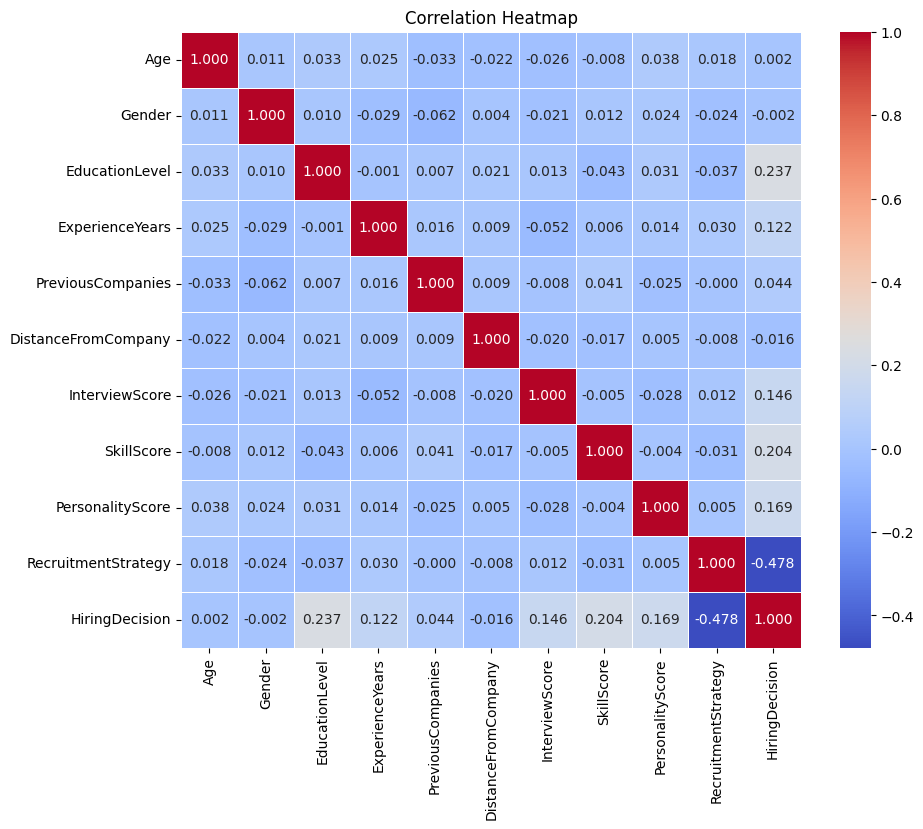

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

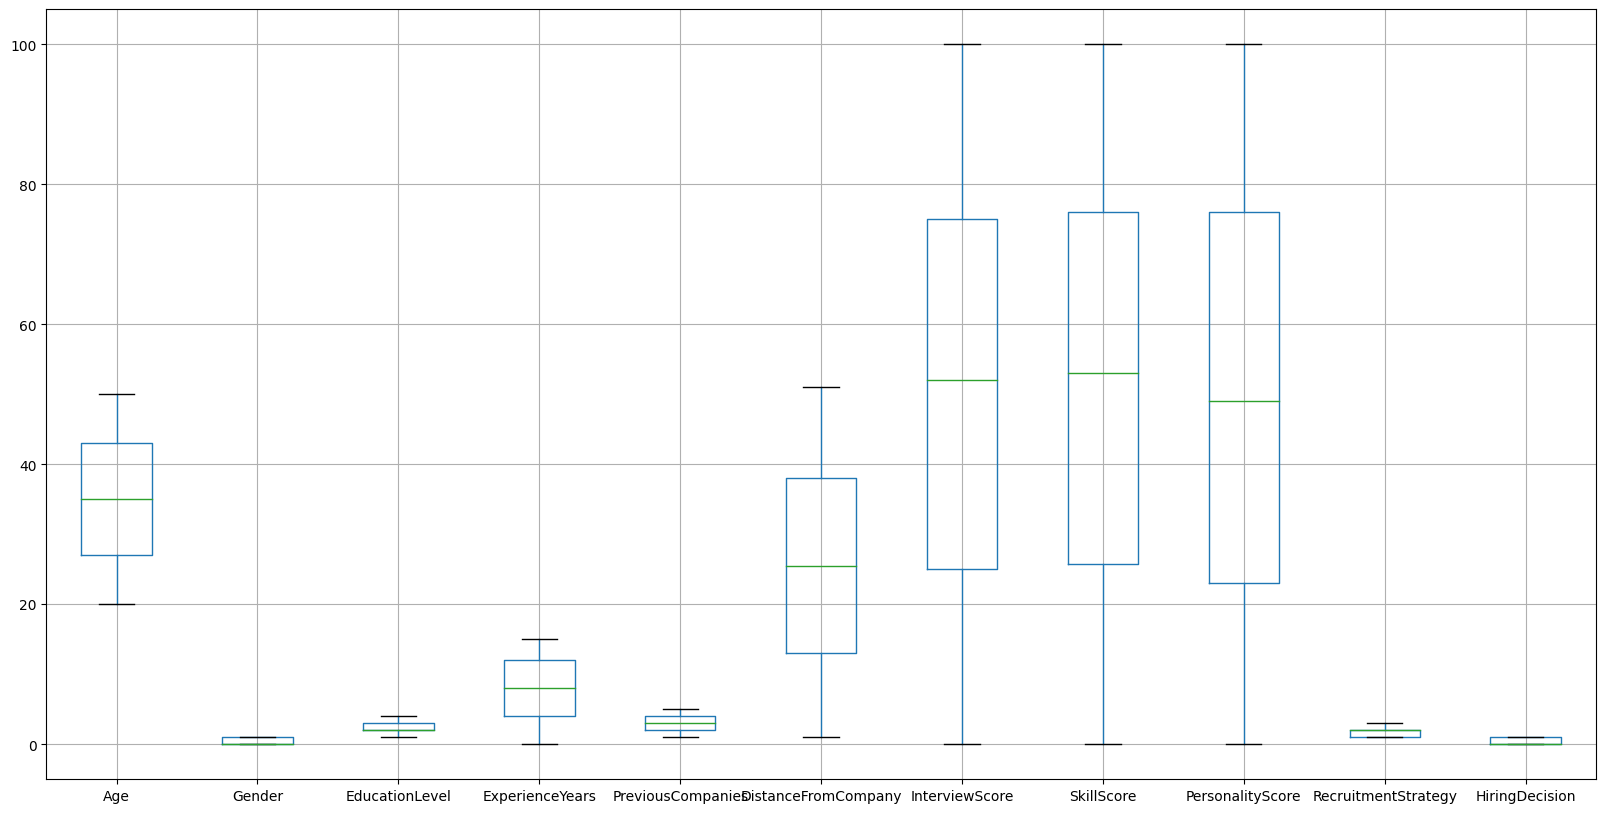

In [16]:
plt.figure(figsize=(20, 10))
df.boxplot()
plt.show()

In [17]:
for col in df.columns:
    print(f"{col}------------{df[col].nunique()}")

Age------------31
Gender------------2
EducationLevel------------4
ExperienceYears------------16
PreviousCompanies------------5
DistanceFromCompany------------51
InterviewScore------------101
SkillScore------------101
PersonalityScore------------101
RecruitmentStrategy------------3
HiringDecision------------2


In [18]:
df['HiringDecision'].value_counts()

HiringDecision
0    1035
1     465
Name: count, dtype: int64

In [19]:
df['RecruitmentStrategy'].value_counts()

RecruitmentStrategy
2    770
1    445
3    285
Name: count, dtype: int64

In [20]:
hired1 = df.groupby('RecruitmentStrategy')['HiringDecision'].mean()*100
hired1

RecruitmentStrategy
1    71.685393
2    13.636364
3    14.385965
Name: HiringDecision, dtype: float64

In [21]:
# Not hired candidates
not_hired = df.groupby('RecruitmentStrategy')['HiringDecision'].apply(lambda x: (x == 0).mean() * 100)
not_hired

RecruitmentStrategy
1    28.314607
2    86.363636
3    85.614035
Name: HiringDecision, dtype: float64

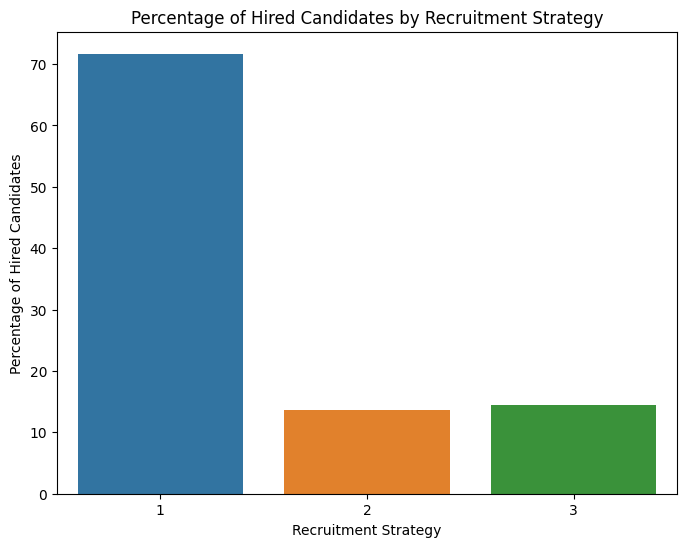

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x=hired1.index, y=hired1.values)
plt.xlabel('Recruitment Strategy')
plt.ylabel('Percentage of Hired Candidates')
plt.title('Percentage of Hired Candidates by Recruitment Strategy')
plt.show()

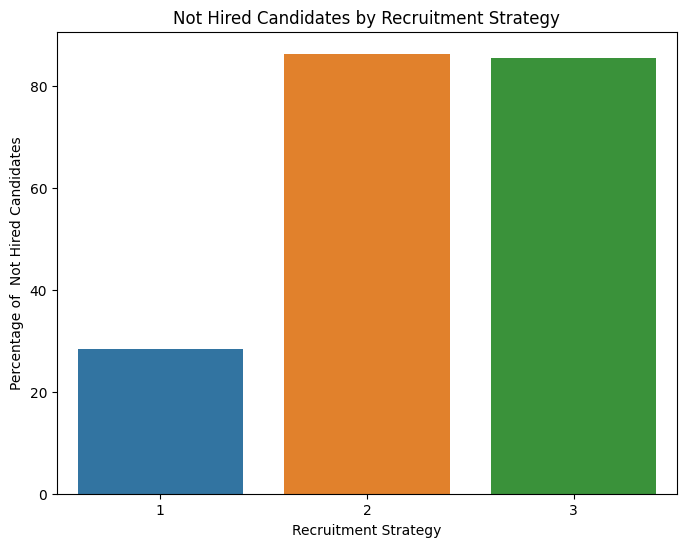

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x=not_hired.index, y=not_hired.values)
plt.xlabel('Recruitment Strategy')
plt.ylabel('Percentage of  Not Hired Candidates')
plt.title('Not Hired Candidates by Recruitment Strategy')
plt.show()

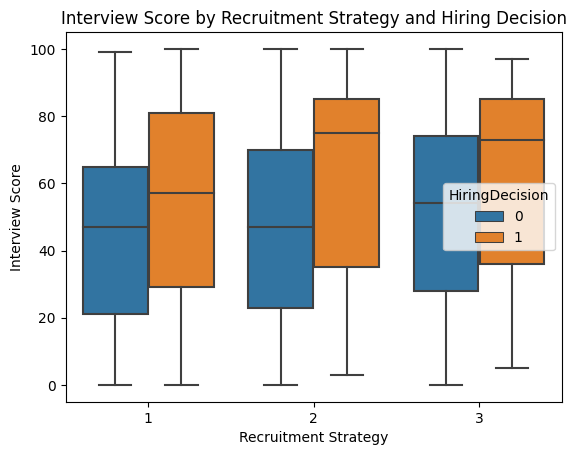

In [24]:
sns.boxplot(x='RecruitmentStrategy', y='InterviewScore', hue='HiringDecision', data=df)
plt.title('Interview Score by Recruitment Strategy and Hiring Decision')
plt.xlabel('Recruitment Strategy')
plt.ylabel('Interview Score')
plt.show()

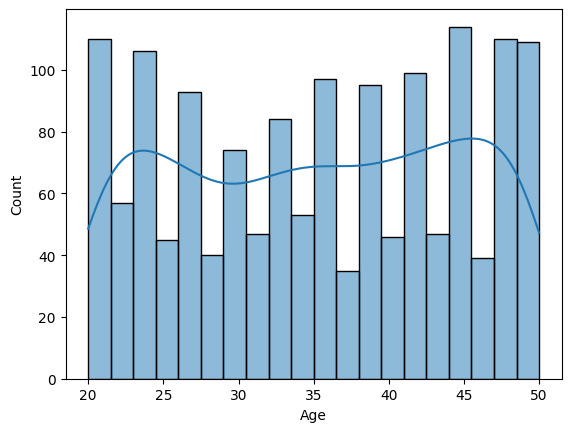

In [25]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.show()

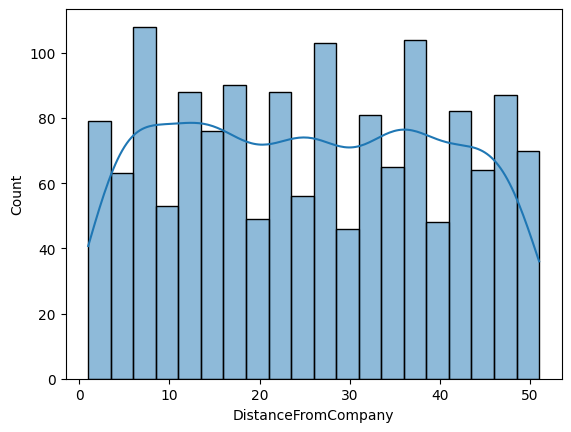

In [26]:
sns.histplot(df['DistanceFromCompany'],bins=20, kde=True)
plt.show()

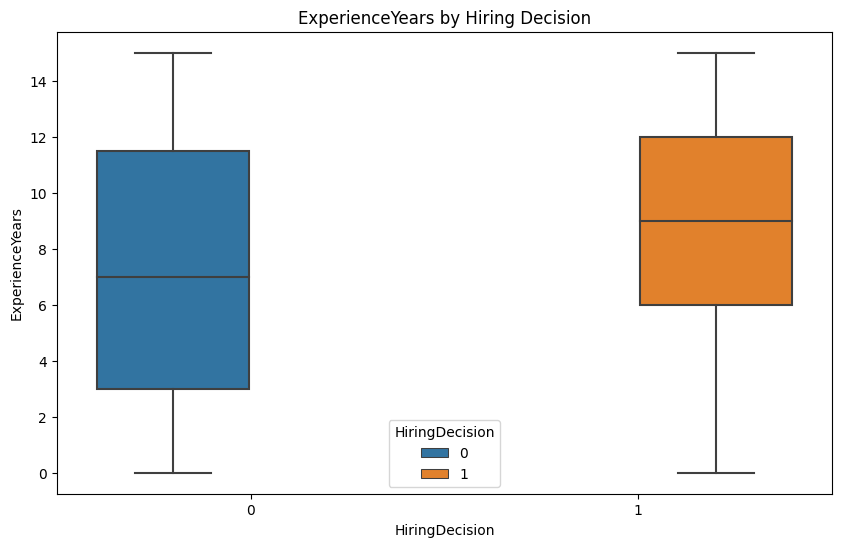

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='HiringDecision', y='ExperienceYears', hue='HiringDecision',data=df)
plt.title("ExperienceYears by Hiring Decision")
plt.show()

In [28]:
df['HiringDecision'].value_counts()

HiringDecision
0    1035
1     465
Name: count, dtype: int64

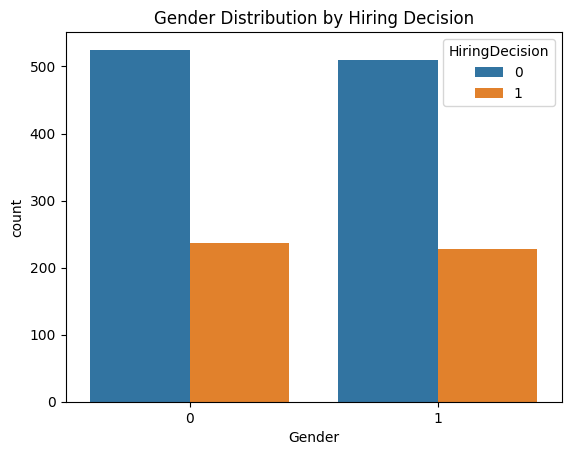

In [29]:
sns.countplot(x='Gender', hue='HiringDecision', data=df)
plt.title("Gender Distribution by Hiring Decision")
plt.show()

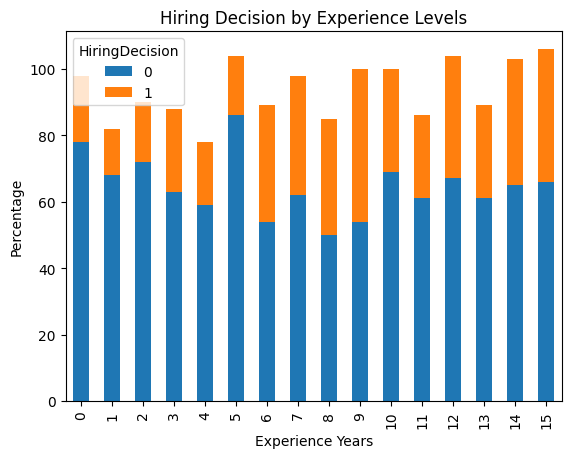

In [30]:
experience_hiring = df.groupby('ExperienceYears')['HiringDecision'].value_counts().unstack()
experience_hiring.plot(kind='bar', stacked=True)
plt.title('Hiring Decision by Experience Levels')
plt.xlabel('Experience Years')
plt.ylabel('Percentage')
plt.show()

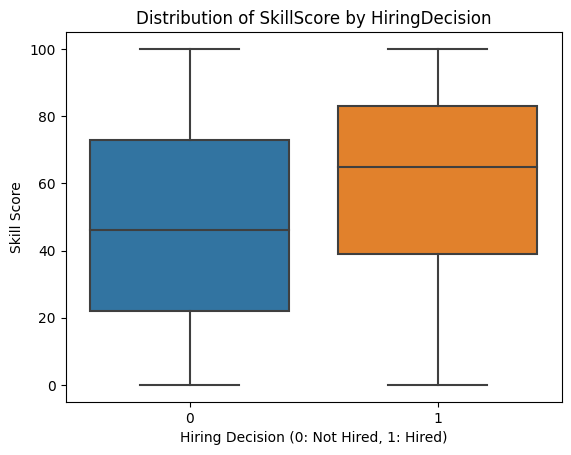

In [31]:
sns.boxplot(x='HiringDecision', y='SkillScore', data=df)
plt.title('Distribution of SkillScore by HiringDecision')
plt.xlabel('Hiring Decision (0: Not Hired, 1: Hired)')
plt.ylabel('Skill Score')
plt.show()


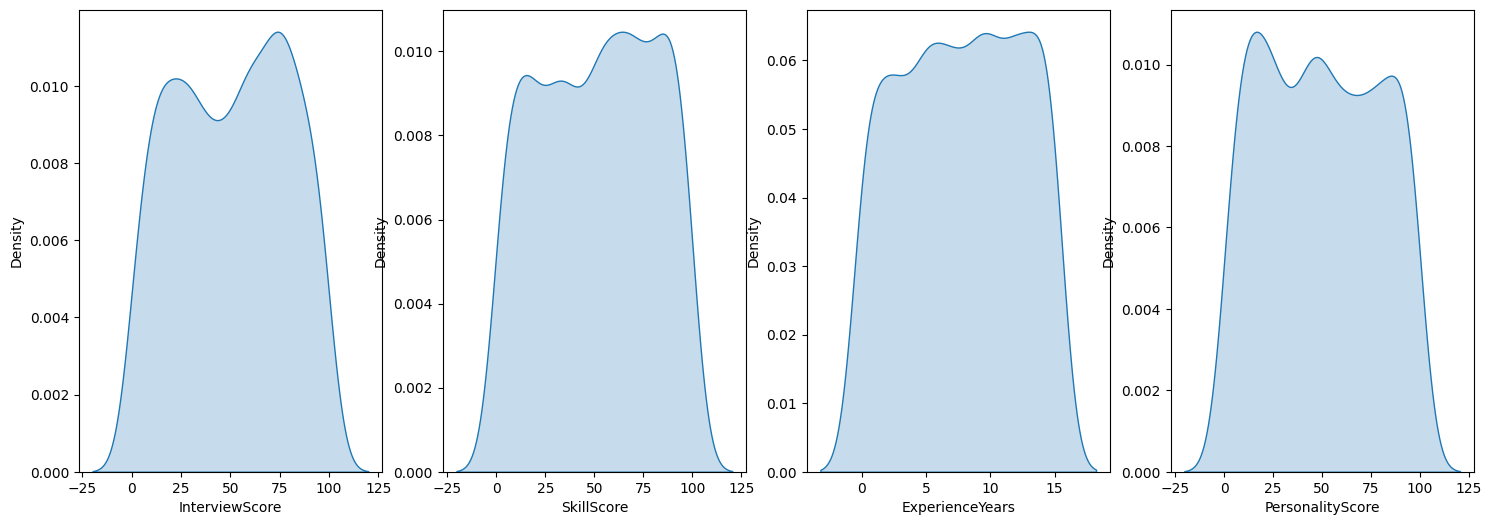

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))
sns.kdeplot(df['InterviewScore'], fill=True, label='Interview Score', ax=axes[0])
sns.kdeplot(df['SkillScore'], fill=True, label='Skill Score', ax=axes[1])
sns.kdeplot(df['ExperienceYears'], fill=True, label='Experience Years', ax=axes[2])
sns.kdeplot(df['PersonalityScore'], fill=True, label='Personality Score', ax=axes[3])
plt.show()

In [33]:
df.head(10)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,27,48,78,91,1,1
1,39,1,4,12,3,26,35,68,80,2,1
2,48,0,2,3,2,10,20,67,13,2,0
3,34,1,2,5,2,6,36,27,70,3,0
4,30,0,1,6,1,43,23,52,85,2,0
5,27,0,3,14,4,32,54,50,50,1,1
6,48,0,2,6,1,17,24,52,64,3,0
7,40,0,4,13,3,11,6,3,92,3,0
8,26,1,3,6,5,29,80,78,51,1,1
9,45,1,2,2,5,30,92,16,94,3,0


In [34]:
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler

numerical_features = ['Age', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']

# Standardize the numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# One-Hot Encode the column
df = pd.get_dummies(df, columns=['EducationLevel'], drop_first=True)
df = pd.get_dummies(df, columns=['RecruitmentStrategy'], drop_first=False)


df.head()

,Age,Gender,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,HiringDecision,EducationLevel_2,EducationLevel_3,EducationLevel_4,RecruitmentStrategy_1,RecruitmentStrategy_2,RecruitmentStrategy_3
0,-0.989083,1,-1.658237,-0.001418,0.103129,-0.089598,0.916174,1.418126,1,True,False,False,True,False,False
1,0.416376,1,0.928044,-0.001418,0.034438,-0.543879,0.575386,1.043255,1,False,False,True,False,True,False
2,1.389387,0,-1.011667,-0.710538,-1.064632,-1.068049,0.541307,-1.240051,0,True,False,False,False,True,False
3,-0.124185,1,-0.580620,-0.710538,-1.339399,-0.508934,-0.821844,0.702463,0,True,False,False,False,False,True
4,-0.556634,0,-0.365097,-1.419657,1.202199,-0.963215,0.030126,1.213651,0,False,False,False,False,True,False


In [35]:
df['HiringDecision'].value_counts()

HiringDecision
0    1035
1     465
Name: count, dtype: int64

In [36]:
# pip install imbalanced-learn

In [37]:
# from imblearn.over_sampling import SMOTE

# # Separate features and target
# X = df.drop('HiringDecision', axis=1)
# y = df['HiringDecision']

# # Apply SMOTE to oversample the minority class
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Check the class distribution after SMOTE
# y_resampled.value_counts()


# Model training

In [38]:
import torch

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [39]:
X = df.drop('HiringDecision', axis=1)
y = df['HiringDecision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
len(X_train), len(y_train), len(X_test), len(y_test)

(1200, 1200, 300, 300)

In [41]:
X_train

,Age,Gender,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,EducationLevel_2,EducationLevel_3,EducationLevel_4,RecruitmentStrategy_1,RecruitmentStrategy_2,RecruitmentStrategy_3
382,0.632601,1,-0.796144,-1.419657,0.103129,0.364683,0.984331,0.191275,False,True,False,False,True,False
538,1.281275,1,-1.011667,-0.001418,-0.171638,0.784018,-0.344741,0.225354,False,True,False,False,True,False
1493,0.848826,1,1.359091,0.707701,0.034438,-0.299266,-0.515135,0.191275,True,False,False,True,False,False
1112,-0.664746,0,0.065950,-0.001418,0.103129,1.063576,0.064204,1.043255,True,False,False,False,False,True
324,1.389387,1,-0.149573,0.707701,-0.789865,-0.788491,0.677622,-0.319913,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.956938,0,-0.580620,-0.001418,1.202199,0.714129,-1.469341,-0.183596,True,False,False,True,False,False
1294,0.740713,1,0.065950,-1.419657,0.171821,1.308188,0.030126,-0.319913,True,False,False,False,True,False
860,1.281275,0,-0.365097,-0.001418,0.583972,-0.019709,-0.310662,0.191275,True,False,False,False,True,False
1459,1.389387,0,1.143567,-1.419657,-1.545475,-1.137938,-0.242505,0.634305,True,False,False,False,True,False


In [42]:
from sklearn.linear_model import LogisticRegression

# Initialize the model with class weights (balanced)
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict the target on test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")


              precision    recall  f1-score   support

           0       0.96      0.85      0.90       215
           1       0.70      0.91      0.79        85

    accuracy                           0.86       300
   macro avg       0.83      0.88      0.84       300
weighted avg       0.88      0.86      0.87       300

[[182  33]
 [  8  77]]
ROC-AUC: 0.9207113543091655


In [43]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the target on test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       215
           1       0.88      0.84      0.86        85

    accuracy                           0.92       300
   macro avg       0.91      0.89      0.90       300
weighted avg       0.92      0.92      0.92       300

[[205  10]
 [ 14  71]]
ROC-AUC: 0.9210396716826266


In [44]:
import xgboost as xgb

# Define the model
model = xgb.XGBClassifier(scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum(), random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the target on test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       215
           1       0.85      0.86      0.85        85

    accuracy                           0.92       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.92      0.92      0.92       300

[[202  13]
 [ 12  73]]
ROC-AUC: 0.916607387140903


In [45]:
from catboost import CatBoostClassifier

# Initialize the CatBoost model
model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.005,
                           depth=10,
                           cat_features=[],
                           verbose=100,
                           random_seed=42,
                           class_weights=[1, 2]
                          )

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")

0:	learn: 0.6890830	total: 60.2ms	remaining: 1m
100:	learn: 0.4030363	total: 564ms	remaining: 5.02s
200:	learn: 0.2716897	total: 1.08s	remaining: 4.3s
300:	learn: 0.2019491	total: 1.62s	remaining: 3.76s
400:	learn: 0.1601530	total: 2.12s	remaining: 3.17s
500:	learn: 0.1303868	total: 2.67s	remaining: 2.65s
600:	learn: 0.1102156	total: 3.19s	remaining: 2.12s
700:	learn: 0.0937031	total: 3.73s	remaining: 1.59s
800:	learn: 0.0808391	total: 4.25s	remaining: 1.05s
900:	learn: 0.0708156	total: 4.76s	remaining: 523ms
999:	learn: 0.0625324	total: 5.27s	remaining: 0us
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       215
           1       0.89      0.89      0.89        85

    accuracy                           0.94       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.94      0.94      0.94       300

Confusion Matrix:
[[206   9]
 [  9  76]]
ROC-AUC: 0.9312175102599178


In [46]:
X_train.dtypes

Age                      float64
Gender                     int64
ExperienceYears          float64
PreviousCompanies        float64
DistanceFromCompany      float64
InterviewScore           float64
SkillScore               float64
PersonalityScore         float64
EducationLevel_2            bool
EducationLevel_3            bool
EducationLevel_4            bool
RecruitmentStrategy_1       bool
RecruitmentStrategy_2       bool
RecruitmentStrategy_3       bool
dtype: object

# Training Neural Network model

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [48]:
boolean_columns = ['EducationLevel_2', 'EducationLevel_3', 'EducationLevel_4', 
                   'RecruitmentStrategy_1', 'RecruitmentStrategy_2', 'RecruitmentStrategy_3']

# Convert the boolean columns to integers
X_train[boolean_columns] = X_train[boolean_columns].astype(int)
X_test[boolean_columns] = X_test[boolean_columns].astype(int)

In [49]:
X_train.dtypes

Age                      float64
Gender                     int64
ExperienceYears          float64
PreviousCompanies        float64
DistanceFromCompany      float64
InterviewScore           float64
SkillScore               float64
PersonalityScore         float64
EducationLevel_2           int64
EducationLevel_3           int64
EducationLevel_4           int64
RecruitmentStrategy_1      int64
RecruitmentStrategy_2      int64
RecruitmentStrategy_3      int64
dtype: object

In [50]:
#Making It tensor
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # Ensure target is column vector
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [51]:
# Create DataLoader for batch processing

train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

In [52]:
#Creating data loader

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [53]:
len(train_data), len(train_loader)

(1200, 38)

In [54]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    
    def forward(self, x):
        x = self.relu(self.fc1(x))  
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [55]:
# Initialize the model for 1 feature 
input_dim = X_train.shape[1]
model = NeuralNetwork(input_dim)

In [56]:
# Loss function and optimizer
num_epochs = 20
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [57]:
# Initialize lists to store the loss and accuracy for each epoch
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Training and Testing Loop
for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # For accuracy calculation
        predicted = (outputs > 0.5).float()  # Convert logits to binary prediction (0 or 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # Calculate training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_accuracy = (correct / total) * 100

    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():  # No need to compute gradients for test phase
        for inputs, labels in test_loader:
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Track loss and accuracy
            test_loss += loss.item()

            # For accuracy calculation
            predicted = (outputs > 0.5).float()  # Convert logits to binary prediction
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    # Calculate test loss and accuracy
    test_loss = test_loss / len(test_loader)
    test_accuracy = (correct_test / total_test) * 100

    # Store the loss and accuracy values for plotting
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    # Print the statistics for this epoch
    print(f"Epoch [{epoch+1}/{num_epochs}],    "
          f"Train Loss: {train_loss:.4f},   Train Accuracy: {train_accuracy:.2f}%, "
          f"Test Loss: {test_loss:.4f},    Test Accuracy: {test_accuracy:.2f}%")

Epoch [1/20],    Train Loss: 0.7005,   Train Accuracy: 69.08%, Test Loss: 0.6672,    Test Accuracy: 82.67%
Epoch [2/20],    Train Loss: 0.6424,   Train Accuracy: 84.25%, Test Loss: 0.6379,    Test Accuracy: 89.33%
Epoch [3/20],    Train Loss: 0.6301,   Train Accuracy: 86.75%, Test Loss: 0.6256,    Test Accuracy: 92.00%
Epoch [4/20],    Train Loss: 0.6267,   Train Accuracy: 87.92%, Test Loss: 0.6272,    Test Accuracy: 91.00%
Epoch [5/20],    Train Loss: 0.6263,   Train Accuracy: 87.67%, Test Loss: 0.6233,    Test Accuracy: 93.33%
Epoch [6/20],    Train Loss: 0.6244,   Train Accuracy: 88.17%, Test Loss: 0.6360,    Test Accuracy: 89.00%
Epoch [7/20],    Train Loss: 0.6244,   Train Accuracy: 87.75%, Test Loss: 0.6263,    Test Accuracy: 92.33%
Epoch [8/20],    Train Loss: 0.6234,   Train Accuracy: 88.08%, Test Loss: 0.6239,    Test Accuracy: 92.00%
Epoch [9/20],    Train Loss: 0.6230,   Train Accuracy: 87.67%, Test Loss: 0.6226,    Test Accuracy: 92.33%
Epoch [10/20],    Train Loss: 0.6179,

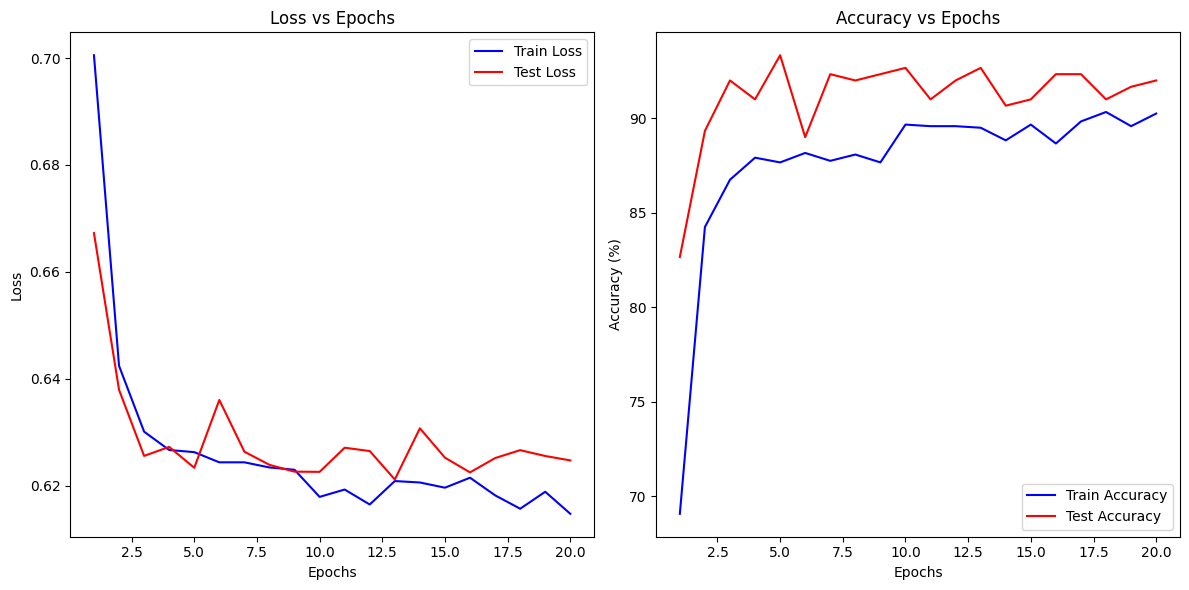

In [58]:
# Plot Training and Test Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # First plot for loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', color='red')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Test Accuracy
plt.subplot(1, 2, 2)  # Second plot for accuracy
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', color='red')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()